# Confronto tra Insertion Sort e Quick Sort
Notebook per il corso *Laboratorio di Algoritmi*

In questo notebook confronteremo le prestazioni di due algoritmi di ordinamento:
- **Insertion Sort**
- **Quick Sort**

Verranno generati dati casuali, eseguiti i test e mostrati i risultati tramite grafici e tabelle.


In [1]:
import random
import time
import matplotlib.pyplot as plt


## Descrizione degli algoritmi

### Insertion Sort
Algoritmo semplice e intuitivo: scorre l’array da sinistra verso destra e inserisce ogni elemento nella corretta posizione tra quelli già ordinati.  
Efficiente solo su liste molto piccole o quasi ordinate.
- **Complessità**:
  - caso migliore: Θ(n)  
  - caso medio e peggiore: Θ(n²)

### Quick Sort
Algoritmo *divide-et-impera*: seleziona un pivot, partiziona l’array in elementi minori, uguali e maggiori, e ordina ricorsivamente le due parti.  
Molto veloce nella pratica (e molto più veloce di insertion sort).
- **Complessità**:  
  - caso medio: Θ(n log n)  
  - caso peggiore: Θ(n²)

L’obiettivo degli esperimenti sarà verificare queste differenze empiricamente.

In [7]:
def insertion_sort(arr):
    # Creiamo una copia dell'array originale per evitare di modificarlo
    # (utile soprattutto nei test comparativi).
    a = arr[:]

    # Partiamo dal secondo elemento (indice 1) fino alla fine.
    # L'elemento in posizione i è la "chiave" da inserire nella parte già ordinata.
    for i in range(1, len(a)):
        key = a[i]       # elemento da inserire
        j = i - 1        # indice dell'elemento precedente nella parte ordinata

        # Sposta verso destra tutti gli elementi maggiori della "key".
        # Questo ciclo continua finché:
        #  j non va sotto zero
        #  a[j] è maggiore di key
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]   # shift a destra dell'elemento più grande
            j -= 1            # continua a spostarsi verso sinistra
        a[j + 1] = key    # Ora j è fermo nella posizione in cui inserire la "key": j+1
    return a    # Restituisce la lista ordinata


In [8]:
def quick_sort(arr):
    # Caso base: se l'array ha 0 o 1 elementi è già ordinato
    if len(arr) <= 1:
        return arr

    # Scelta del pivot: usiamo l'elemento centrale
    pivot = arr[len(arr) // 2]    # (Divisione intera)

    # Costruiamo tre liste:
    # - left:  tutti gli elementi minori del pivot
    # - center: elementi uguali al pivot (gestisce duplicati)
    # - right: tutti gli elementi maggiori del pivot
    #
    # Questo approccio è chiamato "quicksort funzionale"
    # perché crea nuove liste invece di lavorare in-place.
    left = [x for x in arr if x < pivot]
    center = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]

    # Richiamiamo ricorsivamente quick_sort sulle due parti non ordinate
    # e poi concateniamo: sinistra ordinata + pivot(tutti gli elementi uguali al pivot) + destra ordinata.
    return quick_sort(left) + center + quick_sort(right)


## Generazione dei dati di test

Generiamo array casuali di dimensioni crescenti.  
Ogni esecuzione del notebook crea nuovi dati grazie al modulo `random`.

Questo permette di verificare sperimentalmente le differenze tra i due algoritmi.


In [9]:
sizes = [100, 300, 500, 800, 1000]  # modifiche a piacere
datasets = {n: [random.randint(0, 10000) for _ in range(n)] for n in sizes}
# DIZIONARIO-COMPREHENSION {chiave: valore for variabile in sequenza}

sizes


[100, 300, 500, 800, 1000]

## Misurazioni del tempo di esecuzione

Per ogni dimensione dell’array eseguiamo:
- una copia dell’array per **Insertion Sort**
- una copia per **Quick Sort**

Per misurare i tempi utilizziamo `time.perf_counter()`.
I risultati ottenuti rispecchiano il comportamento medio degli algoritmi.


In [10]:
def measure_time(func, arr):
    # time.perf_counter() restituisce il tempo più preciso disponibile
    start = time.perf_counter()
    func(arr)    # Esecuzione dell'algoritmo da misurare
    end = time.perf_counter()    # nuova chiamata a perf_counter per ottenere il tempo attuale
    return end - start    # La differenza end - start dà la durata effettiva dell'esecuzione

results_insertion = []  # lista per i tempi di insertion sort
results_quick = []      # lista per i tempi di quick sort

for n in sizes:
    arr = datasets[n]   # recuperiamo il dataset di dimensione n
    results_insertion.append(measure_time(insertion_sort, arr))    # misura insertion sort su arr
    results_quick.append(measure_time(quick_sort, arr))    # misura quick sort su arr

results_insertion, results_quick


([0.00017471201135776937,
  0.0013306770124472678,
  0.004421060992171988,
  0.012582955998368561,
  0.022429162985645235],
 [0.00015208497643470764,
  0.0038386020169127733,
  0.0020579339761752635,
  0.0017458329966757447,
  0.002152330009266734])

## Risultati sperimentali

Di seguito visualizziamo i tempi ottenuti tramite un grafico.

Ci aspettiamo che QuickSort risulti molto più veloce di Insertion Sort.
- **Insertion Sort** ha complessità quadratica Θ(n²) e cresce molto rapidamente al crescere della dimensione.
- **Quick Sort** ha un tempo medio Θ(n log n) ed è in genere molto più veloce.


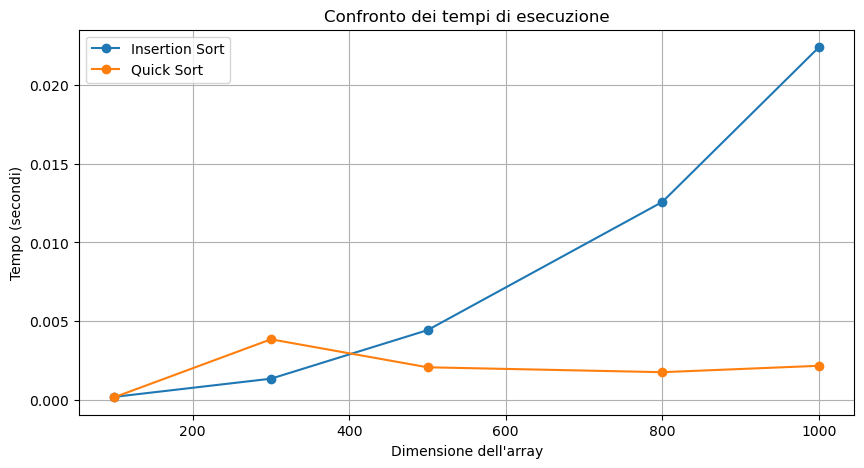

In [11]:
plt.figure(figsize=(10,5))
plt.plot(sizes, results_insertion, marker='o', label="Insertion Sort")
plt.plot(sizes, results_quick, marker='o', label="Quick Sort")
plt.xlabel("Dimensione dell'array")
plt.ylabel("Tempo (secondi)")
plt.title("Confronto dei tempi di esecuzione")
plt.legend()    # mostra la legenda che identifica le curve del grafico
plt.grid(True)  # aggiunge una griglia per rendere più chiaro il grafico
plt.show()      # visualizza il grafico in output


## Conclusioni

I risultati sperimentali ottenuti mostrano chiaramente un divario di prestazioni:

- **Insertion Sort** ha tempi molto più elevati e cresce rapidamente con la dimensione dell'input, in modo quasi quadratico, come previsto dalla complessità Θ(n²).
- **Quick Sort** mantiene tempi molto più bassi e risulta decisamente più veloce, confermando un comportamento medio Θ(n log n).

Questi esperimenti sono pienamente coerenti con la teoria:
Quick Sort è generalmente l’algoritmo di ordinamento più efficiente nella pratica,
mentre Insertion Sort rimane utile solo per input di piccole dimensioni o quasi ordinati.
